In [35]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
# load dataset

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
# summarize loaded dataset

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


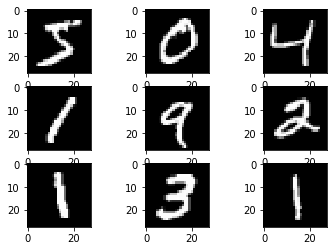

In [39]:
# plot first few images

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [40]:
# Data reshape

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [41]:
# Data Normalization

x_train_n = x_train / 255.
x_test_n = x_test / 255.

In [42]:
# Split data into train/validation/test datasets

x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test_n

### Creating Model Architecture

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

### Architecture

In [44]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [45]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2 ,2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))


# Here, we are reshaping the image to (28, 28)
# But after MaxPooling with (2, 2) window, they will be reduced to (14, 14).
# With the next MaxPooling layer, the images will be reduced to
# (7, 7) by using (2, 2) window and so on..

# This is a standard practice, the image size should decrease with each Conv
# layer and the feature map height should increase as we go along the network.

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

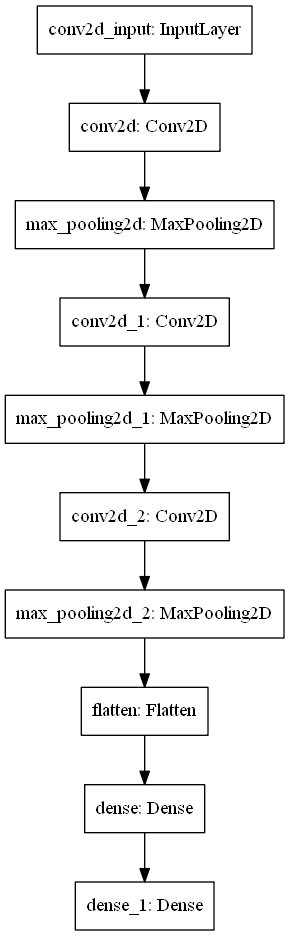

In [47]:
import pydot
keras.utils.plot_model(model)

In [48]:
# Next step is to compile the model

In [49]:
from tensorflow.keras import optimizers

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

# RMSprop have some advantage over SGD while performing image processing.
# lr stands for learning rate of 0.001.
# By default, the lr is 0.01.
# 'acc' -> accuracy

In [50]:
# Model fitting

model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 32,
                         validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 59s 1ms/sample - loss: 0.5699 - acc: 0.8416 - val_loss: 0.2609 - val_acc: 0.9204
Epoch 2/30
55000/55000 [==============================] - 61s 1ms/sample - loss: 0.1781 - acc: 0.9449 - val_loss: 0.1445 - val_acc: 0.9570
Epoch 3/30
55000/55000 [==============================] - 60s 1ms/sample - loss: 0.1305 - acc: 0.9599 - val_loss: 0.1241 - val_acc: 0.9606
Epoch 4/30
55000/55000 [==============================] - 61s 1ms/sample - loss: 0.1057 - acc: 0.9672 - val_loss: 0.0974 - val_acc: 0.9746
Epoch 5/30
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.0908 - acc: 0.9725 - val_loss: 0.1083 - val_acc: 0.9660
Epoch 6/30
55000/55000 [==============================] - 60s 1ms/sample - loss: 0.0783 - acc: 0.9760 - val_loss: 0.0741 - val_acc: 0.9784
Epoch 7/30
55000/55000 [==============================] - 60s 1ms/sample - loss: 0.0704 - acc: 0.9785 - val_loss: 0.0

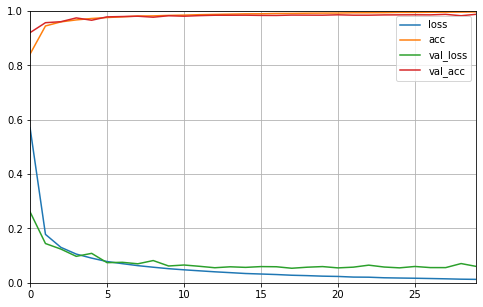

In [51]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### We will evaluate our model

In [53]:
ev = model.evaluate(x_test_n, y_test)

10000/10000 [==============================] - 3s 272us/sample - loss: 0.0657 - acc: 0.9863


In [54]:
ev

[0.06569528349398787, 0.9863]

We are getting an accuracy of around 98.63% which is pretty good.

CNN performs better in comparison to a randomly initialized ANN. It converges faster with more accuracy.

In [55]:
x_new = x_test[:3]

In [56]:
y_pred = model.predict_classes(x_new)
y_pred

array([7, 2, 1], dtype=int64)

In [57]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


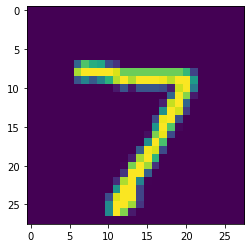

In [58]:
print(plt.imshow(x_test[0].reshape((28, 28))))

AxesImage(54,36;334.8x217.44)


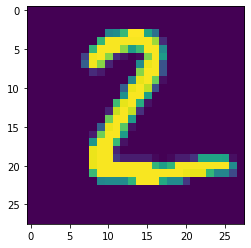

In [59]:
print(plt.imshow(x_test[1].reshape((28, 28))))

AxesImage(54,36;334.8x217.44)


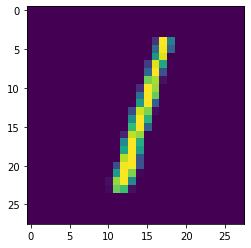

In [60]:
print(plt.imshow(x_test[2].reshape((28, 28))))

In [61]:
model.save("part2.h5")

In [62]:
from tensorflow.keras import backend as k
k.clear_session()
del model